# How to generate spin polarized band structure?

<img src="Bandstructure.png" widht=600/>

This tutorial illustrate how to process the output of Quantum ESPRESSO and generate spin polarized band structure using 'espressoutis' package.

We assume the following

- You have installed latest version of espressutils package
- You have performed SCF and Bands calculation of the system of your interest

For sake of this tutorial we cosider a caculation performed for BCC-iron. Here are the inputs:

**SCF**
```
     &CONTROL
        prefix='fe',
        pseudo_dir = './'
        outdir = './out'
        !verbosity = 'high',
     /
     &SYSTEM
        ibrav = 3,
        celldm(1) = 5.42,
        nat = 1,
        ntyp = 1,
        ecutwfc = 25.0,
        ecutrho = 200.0,
        occupations = 'smearing',
        smearing    = 'mv',
        degauss     = 0.01,
        nspin = 2, 
        starting_magnetization(1) = 0.6
     /
     &ELECTRONS
     /
    ATOMIC_SPECIES
       Fe  1.0  Fe.pbe-nd-rrkjus.UPF
    ATOMIC_POSITIONS crystal
       Fe 0.0  0.0  0.0 
    ! this is a comment that the code will ignore
    K_POINTS automatic
       8 8 8   1 1 1
```
**PW-BANDS**
```
     &CONTROL
        prefix='fe',
        pseudo_dir = './'
        outdir = './out'
        !verbosity = 'high',
        calculation='bands'
     /
     &SYSTEM
        ibrav = 3,
        celldm(1) = 5.42,
        nat = 1,
        ntyp = 1,
        ecutwfc = 25.0,
        ecutrho = 200.0,
        nbnd=8
        occupations = 'smearing',
        smearing    = 'mv',
        degauss     = 0.01,
        nspin = 2, 
        starting_magnetization(1) = 0.6
     /
     &ELECTRONS
     /
    ATOMIC_SPECIES
       Fe  1.0  Fe.pbe-nd-rrkjus.UPF

    ATOMIC_POSITIONS crystal
       Fe 0.0  0.0  0.0 
    K_POINTS {crystal_b}
    4
    0 0 0 30
    -.5 .5 .5 30 
    .25 .25 .25 30 
    0 .5 0 0
```   
**Bands.x : 2 files for up and down channel**
```
    &bands
        prefix='fe',
        outdir  = './out'
        filband = 'fe.bands_up.dat'
        lsym = .true.,
        spin_component=1
    /
    
    &bands
        prefix='fe',
        outdir  = './out'
        filband = 'fe.bands_dn.dat'
        lsym = .true.,
        spin_component=2
    /
```

This will produce fe.bands_up.dat/fe.bands_dn.dat that will be used for plotting.

**Attentions: The input shown here are for illustration only. Care has to be taken before drawing any meaningful conclusions.**

# Post processing

we use espressoutils package to generate bandstructure

Instll it with :
>pip install espressoutils

In [59]:
from espressoutils.espressoutils import espressoutils
Q=espressoutils()

Lets check out the documentation of the function of our interst:

In [60]:
help(Q.generate_spinpol_BS)

Help on method generate_spinpol_BS in module espressoutils.espressoutils:

generate_spinpol_BS(upfile, dnfile, e_ref, BZ_labels=['${\\Gamma}$', 'L'], symmetry_lines=[], subdiv=30, ylims=(-4, 4)) method of espressoutils.espressoutils.espressoutils instance
    Generates a spin polarized band structure.  
    upfile/dnfile: dat files generated by bands.x program for UP/DOWN channel
    BZ_labels : labels along symmetry lines.
    Either provide subdiv or positions of symmetry_lines..
        Subdiv: number of subdivisions along each line. (last number of your KPOINTS line in bands.x input)
        symmetry_lines : coordinates of symmetry points on X axis (Those are printed 'high-symmetry point' in output of bands.x)
    ylims : A tuple for determining the y-limits of the plot: default is (-4,4) eV. Fermi is adjusted to 0.
    Return 'plt' object (matplolib.pyplot)



## Using subdiv argument
`subdiv` are the number of points between symmetry points. This option is useful if you have identical number of points (i.e. last value in K_Points lines for pw-bands calculations)

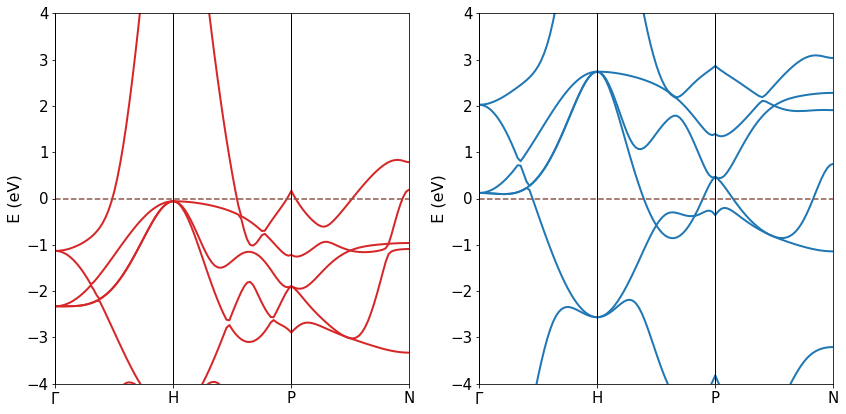

In [61]:
plt=Q.generate_spinpol_BS('fe.bands_up.dat','fe.bands_dn.dat', # DAT files from bands.x
                e_ref=12.8010,                                 # femi energy
                BZ_labels=['${\\Gamma}$','H','P','N'],         # Labels for symmetry lines
                subdiv=40
) 
plt.savefig("Bandstructure.png")
plt.show()

## Using symmetry_lines argument
In case it is not possible to have `subdiv`s one can use `symmetry_lines` argument. We need to extract the coordinates of symmetry lines from the bands.x program. Inspect the lines that read:
> high-symmetry point:  0.0000 0.0000 0.0000   x coordinate   0.0000\
> high-symmetry point: -1.0000 0.0000 0.0000   x coordinate   1.0000

The last value of the lines are the coordinates 

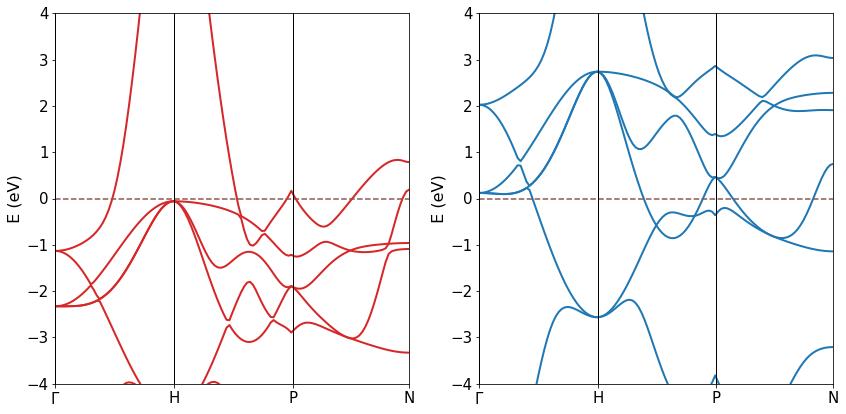

In [62]:
plt=Q.generate_spinpol_BS('fe.bands_up.dat','fe.bands_dn.dat', # DAT files from bands.x
                e_ref=12.8010,                                 # femi energy
                BZ_labels=['${\\Gamma}$','H','P','N'],         # Labels for symmetry lines
                symmetry_lines=[0,1,2.,2.9841],
                subdiv=40,
) 
plt.savefig("Bandstructure.png")
plt.show()